<a href="https://colab.research.google.com/github/Timoooooooootttthhyyyyyyy/Timothy/blob/main/09_10_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
count=len(dataset)
print(count)

891


In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print('Median of age coulumn: %.2f'%(dataset['Age'].median(skipna=True)))

Median of age coulumn: 28.00


In [7]:
print('Percent of missing records in the Cabin column: %.2f %%'%((dataset['Cabin'].isnull().sum()/len(dataset))*100))

Percent of missing records in the Cabin column: 77.10 %


In [8]:
print('Most common boarding port of embarkation: %s'%dataset['Embarked'].value_counts().idxmax())

Most common boarding port of embarkation: S


In [9]:
dataset['Age'].fillna(dataset['Age'].median(skipna=True),inplace=True)


In [10]:
dataset['Embarked'].fillna(dataset['Embarked'].value_counts().idxmax(),inplace=True)

In [11]:
dataset.drop('Cabin',axis=1,inplace=True)

In [12]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
dataset.drop('PassengerId',axis=1,inplace=True)

In [14]:
dataset.drop('Name',axis=1,inplace=True)

In [15]:
dataset.drop('Ticket',axis=1,inplace=True)

In [16]:
dataset['TravelAlone']=np.where((dataset['SibSp']+dataset['Parch'])>0, 0,1)

In [17]:
dataset.drop('SibSp',axis=1,inplace=True)

In [18]:
dataset.drop('Parch',axis=1,inplace=True)

In [19]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [20]:
dataset.shape

(891, 7)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   TravelAlone  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [22]:
dataset.describe()

,Survived,Pclass,Age,Fare,TravelAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,0.602694
std,0.486592,0.836071,13.019697,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    491
1    216
2    184
Name: Pclass, dtype: int64

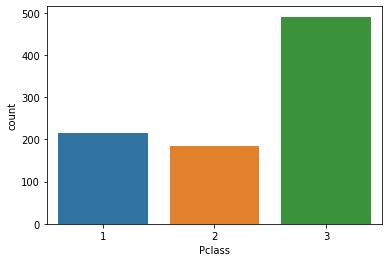

In [23]:
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


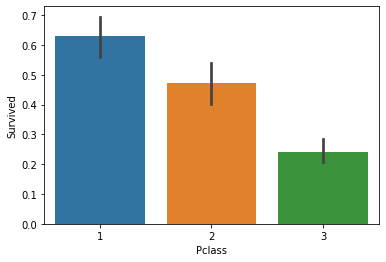

In [24]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      577
female    314
Name: Sex, dtype: int64

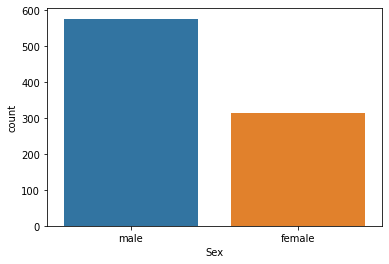

In [25]:
sns.countplot('Sex',data=dataset)
dataset['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


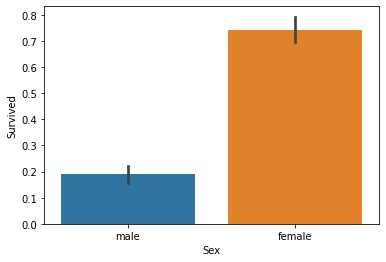

In [26]:
sns.barplot(x='Sex',y='Survived',data=dataset)
dataset.groupby('Sex',as_index=False).Survived.mean()

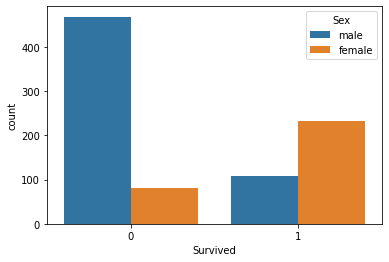

In [27]:
sns.countplot(x='Survived',hue='Sex',data=dataset)


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [29]:
x=dataset.drop('Survived', 1)
y=dataset.Survived
x=dataset.drop('Survived', 1)

<ipython-input-29-5dd938c38dc1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=dataset.drop('Survived', 1)
<ipython-input-29-5dd938c38dc1>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=dataset.drop('Survived', 1)


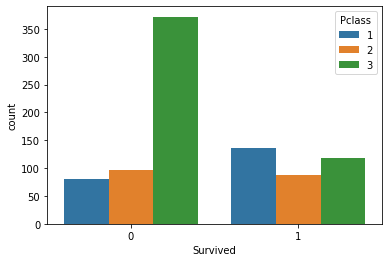

In [31]:
sns.countplot(x='Survived', hue='Pclass', data=dataset)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


S    646
C    168
Q     77
Name: Embarked, dtype: int64

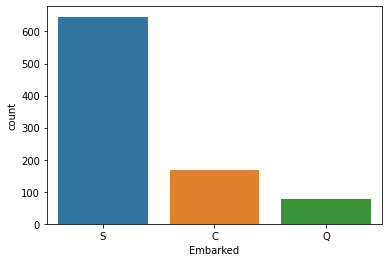

In [32]:
sns.countplot('Embarked', data=dataset)
dataset['Embarked'].value_counts()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


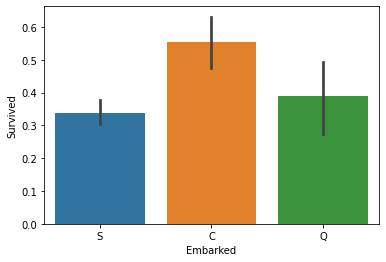

In [36]:
sns.barplot(x='Embarked', y='Survived',data=dataset)
dataset.groupby('Embarked',as_index=False).Survived.mean()

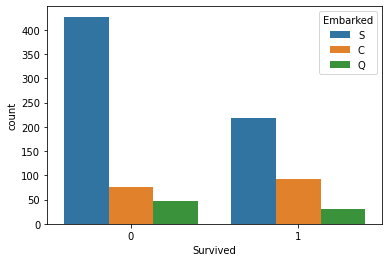

In [37]:
sns.countplot(x='Survived', hue='Embarked', data=dataset)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    537
0    354
Name: TravelAlone, dtype: int64

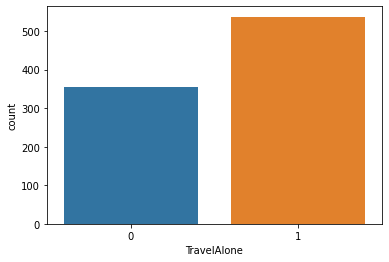

In [38]:
sns.countplot('TravelAlone',data=dataset)
dataset['TravelAlone'].value_counts()

,TravelAlone,Survived
0,0,0.505650
1,1,0.303538


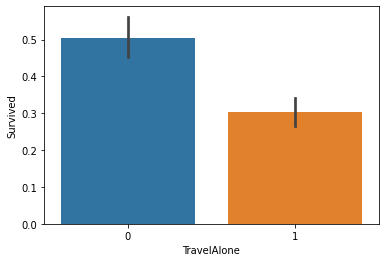

In [39]:
sns.barplot(x='TravelAlone',y='Survived',data=dataset)
dataset.groupby('TravelAlone',as_index=False).Survived.mean()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    549
1    342
Name: Survived, dtype: int64

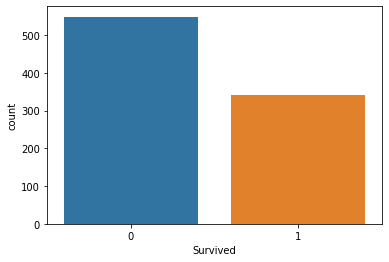

In [40]:
sns.countplot('Survived',data=dataset)
dataset['Survived'].value_counts()

In [42]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['Sex']=label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked']=label_encoder.fit_transform(dataset['Embarked'])
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1


In [43]:
x=dataset.drop('Survived', 1)
y=dataset.Survived
x= dataset.drop('Survived', 1)

<ipython-input-43-c8e9c68a249f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=dataset.drop('Survived', 1)
<ipython-input-43-c8e9c68a249f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x= dataset.drop('Survived', 1)


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [46]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred=lr_model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0])

In [48]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model: ',(accuracy_score(y_test,y_pred)*100))

Accuracy of the model:  78.73134328358209


In [50]:
a=pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
707,1,0
37,0,0
615,1,1
169,0,0
68,1,1


Text(33.0, 0.5, 'True')

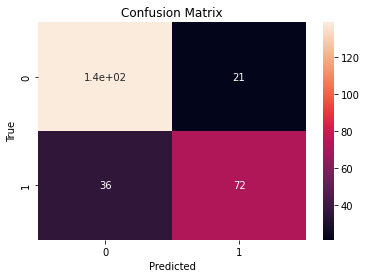

In [53]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       160
           1       0.77      0.67      0.72       108

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268

